# TP 3 
Nous travaillons sur la base de données diabetes de python. La base initiale comporte n “ 442
patients et p “ 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la
maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 200 variables
explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volontairement
mélangé les variables entre elle de façon aléatoire. Bien entendu le robot a ensuite pris soin
d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes.
La nouvelle base de données comporte n “ 442 patients et p “ 210 covariables, notés X. Saurez-vous
déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?

### (Q1) 
Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/
portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer.
Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy.stats import t

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv', header=None)

In [6]:
y = df.iloc[:,-1:]
x = df.iloc[:,:-1]

In [7]:
print("Il y a {1} variables explicatives et {0} observations".format(*x.shape))

Il y a 210 variables explicatives et 442 observations


### (Q2)
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres). Commenter les graphiques obtenus.

In [8]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,1.934099e-17,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.436711e+00,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.602634e-01,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,4.227517e-02,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.433939e-01,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.737036e+00,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00


In [9]:
isCenter = all(x.mean()<10**-10)
isNormalized = all(round(x.std(ddof=0), 6)==1.0)

In [10]:
isCenter, isNormalized

(True, True)

Les données explicatives sont centrées et normalisées. Cependant on constate que la normalisation a été effectuté via le calcul biaisé de la variance: $\frac {\sum (x - \bar x)}{n} $

In [11]:
print("La moyenne de la variable à expliquer est de {} et sa variance vaut {}: elle n'est ni centrée ni normalisée.".format(int(y.mean()), int(y.std())))

La moyenne de la variable à expliquer est de 152 et sa variance vaut 77: elle n'est ni centrée ni normalisée.


In [12]:
sample_x = x.sample(4, axis=1, random_state=1)

In [13]:
sample = sample_x.add(y, fill_value=0)

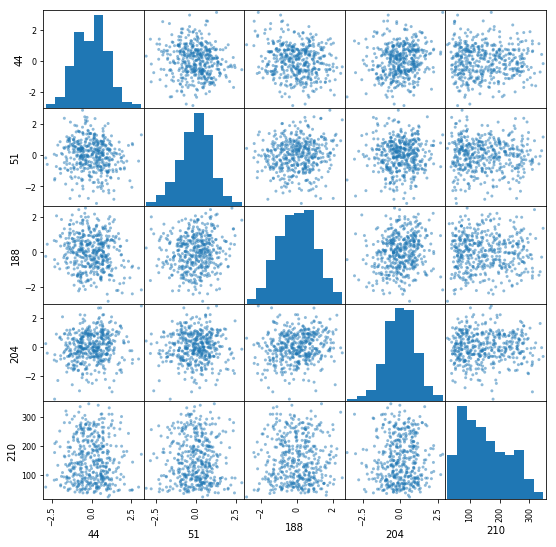

In [14]:
pd.plotting.scatter_matrix(sample, figsize=(9,9))
plt.show()

Les covariables semblent suivrent une distribution normale. On n'aperçoit aucune corrélation avec la variable à expliquer.

### (Q3)
Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain,
un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =  1)

In [16]:
print("La taille de x_train et x_test sont respectivement {} et {}".format(x_train.shape, x_test.shape))

La taille de x_train et x_test sont respectivement (353, 210) et (89, 210)


### (Q4) 
Donner la matrice de covariance calculée sur X train . Tracer le graphe de la décroissance des valeurs
propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les premières
variables de l’ACP. On gardera 60 variables dans la suite.

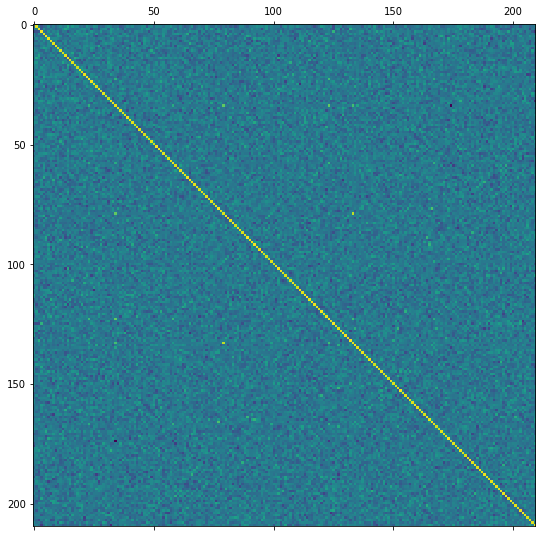

In [17]:
plt.figure(figsize=(9,9))
plt.matshow(x_train.cov(), fignum=1)

In [18]:
U, S, V = np.linalg.svd(x_train.cov())

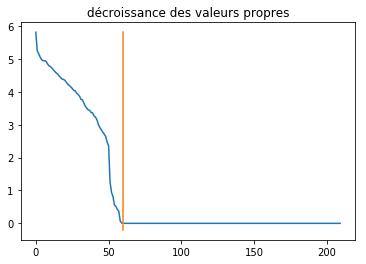

In [19]:
plt.plot(S)
plt.title('décroissance des valeurs propres')
plt.plot( [60,60],[S.max(),-0.2])
plt.show()

On s'aperçoit que les valeurs propres deviennent négligeable à partir de la 60e variable.

### (Q5) 
Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à appliquer OLS avec Y et X train V p1:60q , où V p1:60q contient les vecteurs propres (associés
aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de
même avec la méthode des moindres carrés classique.

In [20]:
U_pca = U[:,:60]
V_pca = V.T[:,:60]
S_pca = np.diag(S[:60])

In [21]:
x_pca = x_train @ V_pca

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lr_pca = LinearRegression()

In [25]:
lr_pca.fit(x_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

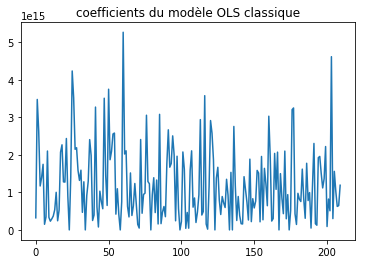

In [26]:
plt.plot(abs(lr.coef_[0]))
plt.title('coefficients du modèle OLS classique')
plt.show()

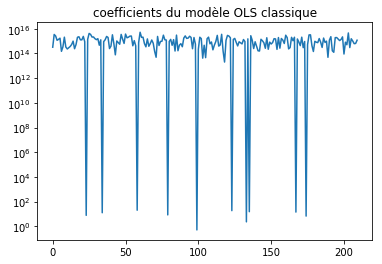

In [27]:
# plt.plot(abs(lr.coef_[0])
plt.semilogy(abs(lr.coef_[0]))
plt.title('coefficients du modèle OLS classique')
plt.show()

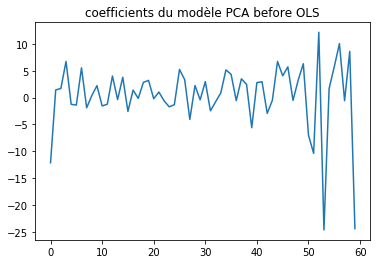

In [28]:
plt.plot(lr_pca.coef_[0])
plt.title('coefficients du modèle PCA before OLS')
plt.show()

Les coefficients sont bien inférieurs lorsque l'on applique PCA avant OLS.

### (Q6)
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne
de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter.
Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension).
Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y
sut le train

In [29]:
scaler = StandardScaler()

scaler.fit(x_pca)

x_cr = scaler.transform(x_pca)

y_cr = scaler.fit_transform(y)

lr_cr = LinearRegression()

lr_cr.fit(x_cr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print("L'intercept du modèle classique vaut {:.2f} tandis que celle du modèle PCA before OLS est de {:.2f}".format(lr.intercept_[0],lr_pca.intercept_[0]))

print("La valeur moyenne de y sur le train set est de {:.2f}".format(y_train.mean().values[0]))

L'intercept du modèle classique vaut 152.49 tandis que celle du modèle PCA before OLS est de 150.58
La valeur moyenne de y sur le train set est de 153.38


Les intercepts ne sont pas égaux car les données ne sont pas centrées réduites.

In [31]:
print("le nouvel intercept est égal à {:.2f}, on retrouve la moyenne des valeurs de y.".format(lr_cr.intercept_[0]))

le nouvel intercept est égal à 153.38, on retrouve la moyenne des valeurs de y.


### (Q7)
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon
test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de
détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

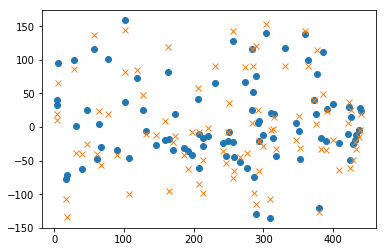

In [32]:
plt.plot(y_test - lr_pca.predict(x_test @ V_pca), "o")
plt.plot(y_test - lr.predict(x_test), "x")

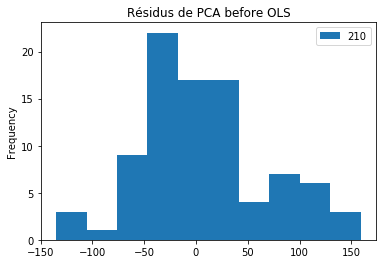

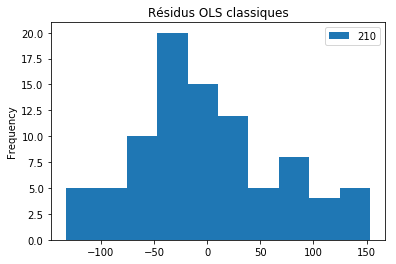

In [33]:
(y_test - lr_pca.predict(x_test @ V_pca)).plot.hist(title = "Résidus de PCA before OLS")
(y_test - lr.predict(x_test)).plot.hist(title = "Résidus OLS classiques")
plt.show()

In [34]:
print("le coefficient de détermination sur l'échantillon test du modèle PCA before OLS est de {:.4f}".format(lr_pca.score(x_test @ V_pca,y_test)))

le coefficient de détermination sur l'échantillon test du modèle PCA before OLS est de 0.2985


In [35]:
print("le coefficient de détermination sur l'échantillon test du modèle OLS classique est de {:.4f}".format(lr.score(x_test,y_test)))

le coefficient de détermination sur l'échantillon test du modèle OLS classique est de 0.1220


In [36]:
print("le risque de prédiction sur l'échantillon test du modèle PCA before OLS est de {:.4f}".format(mean_squared_error(lr_pca.predict(x_test @ V_pca), y_test)))

le risque de prédiction sur l'échantillon test du modèle PCA before OLS est de 3738.4002


In [37]:
print("le risque de prédiction sur l'échantillon test du OLS classique est de {:.4f}".format(mean_squared_error(lr.predict(x_test), y_test)))

le risque de prédiction sur l'échantillon test du OLS classique est de 4678.7365


### (Q8)
Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité
du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode.
C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables.
Afficher l’ordre de séléction des variables.

In [38]:
def regr(col, y_):
    '''Pour une colonne donnée on calcule la statistique et la p valeur associée au test r = X_k*theta_k'''
    gram = col.T @ col
    n = len(y_)
    rg = np.linalg.matrix_rank(gram)
    gram_inv = np.linalg.inv(gram)
    theta_chap = gram_inv @  col.T @ y_.astype(float)
    ychap = theta_chap * col
    s2 = 1/(len(col)-rg)*np.linalg.norm(y_.values-ychap.values)**2
    ecart_type  = m.sqrt(s2*gram_inv)
    T_stat = theta_chap/ecart_type
    pval = (1 - t.cdf(abs(T_stat), n-rg)) * 2
    return T_stat, pval

In [39]:
def features_selection(df, target):
    '''On calcule les pvaleurs associées à chacune des colonnes'''
    regression =  [regr(col, target) for col in [df[[col]] for col in df.columns]]
    pvals = np.array(regression)[:,1]
    Tstats = np.array(regression)[:,0]
    return Tstats, pvals

On rajoute une colonne constante de 1 correspondant à l'intercept. Il s'agit de la colonne 210.

In [40]:
concat = pd.concat([x_train, pd.Series(np.ones(len(x_train)), name= 210, index=x_train.index)], axis = 1)

Puis on effectue une boucle en supprimant à chaque itération la variable sélectionnée du dataframe.

CPU times: user 3min 25s, sys: 8.68 s, total: 3min 34s
Wall time: 1min 29s


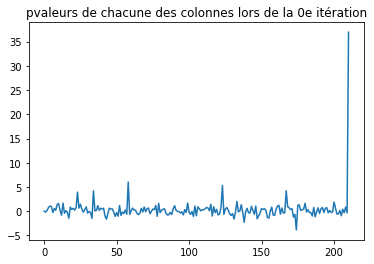

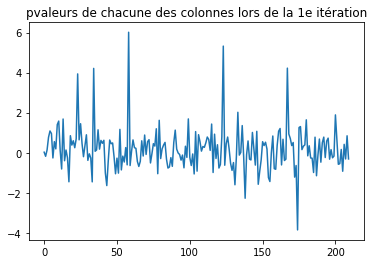

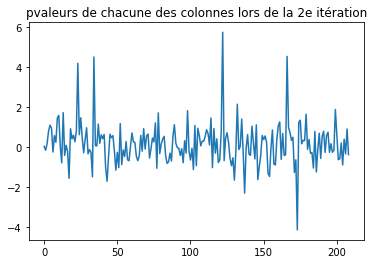

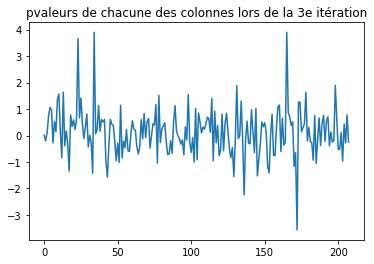

In [41]:
%%time
data = concat
features = []
theta = []
r =  y_train.copy()
pvals = []
pvals_selected = []
features_selected = []
flag = True
plots = []
while not data.empty:
    regr_ = features_selection(data, r)
    mini = min(regr_[1])
    if len(features) <= 3:
        plt.figure()
        plt.plot(regr_[0].reshape(-1,1))
        plt.title('pvaleurs de chacune des colonnes lors de la {}e itération'.format(len(features)))
    pvals.append(mini)
    col = data.columns[regr_[1].tolist().index(mini)]
    if mini < 0.1 and flag:
        pvals_selected.append(mini)
        features_selected.append(col)
    else:
        flag = False
    lr_ = LinearRegression()
    lr_.fit(concat[col].values.reshape(-1,1), r)
    theta.append(lr_.coef_[0])
    r -= concat[col].apply(lambda x : x*theta[-1])
    data = data.drop(columns=col)
    features.append(col)

In [42]:
print("Les features sélectionnés sans critère d'arrêt sont dans l'ordre:",*features)

Les features sélectionnés sans critère d'arrêt sont dans l'ordre: 210 58 123 34 167 23 174 138 200 180 10 13 131 133 147 43 33 25 175 155 115 9 90 205 161 79 136 77 176 37 52 126 78 99 51 4 172 12 5 162 17 154 104 117 105 42 146 122 143 116 103 53 145 120 65 148 24 185 179 186 192 40 157 173 76 196 187 169 30 129 106 96 86 88 67 101 69 72 163 195 164 3 168 189 201 20 39 171 113 36 41 45 158 206 49 194 16 85 170 208 181 159 81 55 57 66 29 125 71 128 75 7 54 11 59 100 95 26 15 6 18 31 109 89 139 14 1 50 140 97 83 27 32 150 93 124 73 203 184 199 46 84 121 202 152 107 64 82 119 111 112 130 165 198 160 151 48 118 44 191 156 178 61 188 28 62 108 207 60 22 153 74 114 19 80 141 149 102 193 63 8 94 91 182 135 98 21 142 134 204 110 56 137 38 127 132 177 144 197 2 183 68 70 0 190 35 92 87 209 166 47


### (Q9) 
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant
(i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en
abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières
p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la
ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

Le graphique des statistiques obtenues lors de la sélection des variables se trouvent à la question précédente.

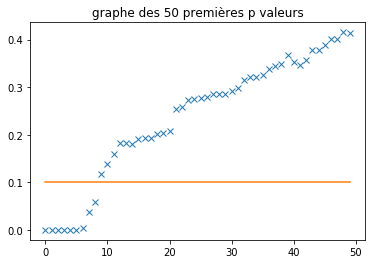

In [43]:
plt.plot(np.array(pvals[:50]).ravel(), 'x')
plt.plot([0.1]*50)
plt.title("graphe des 50 premières p valeurs")
plt.show()

In [44]:
print("les features sélectionnées avec le critère d'arrêt sont: ", *features_selected)

les features sélectionnées avec le critère d'arrêt sont:  210 58 123 34 167 23 174 138 200


### (Q10)
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon
test et le comparer à ceux de OLS et PCA before OLS.

In [45]:
x_selected = concat[features_selected]

lr_selected = LinearRegression()

lr_selected.fit(x_selected, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
concat_test = pd.concat([x_test, pd.Series(np.ones(len(x_test)), name= 210, index=x_test.index)], axis = 1)

In [47]:
print("Le risque de prédiction est de {:.2f} et le  coefficient de détermination vaut {:.2f}".format(mean_squared_error(lr_selected.predict(concat_test[features_selected]), y_test),lr_selected.score(concat_test[features_selected], y_test)))

Le risque de prédiction est de 3073.54 et le  coefficient de détermination vaut 0.42


### (Q11)
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [48]:
from sklearn import model_selection

In [49]:
kf = model_selection.KFold(n_splits=4)

In [50]:
kf.get_n_splits(x)

4

In [51]:
print("fold 1{}\n\n fold 2{}\n\n fold 3{}\n\n fold 4{}".format(*[x[1] for x in list(kf.split(x))]))

fold 1[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110]

 fold 2[111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221]

 fold 3[222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 

In [52]:
r = []
for alpha in np.logspace(0.1, 3.0, num=20):
    ridge =  Ridge(alpha=alpha)
    risques = []
    for train_index, test_index in kf.split(x_train):
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        ridge.fit(X_train, Y_train)
        risques.append(mean_squared_error(ridge.predict(X_test), Y_test))
    r.append(np.array(risques).mean())
    print('alpha :{:.2f} ----> risques mean : {:.2f}'.format(alpha, r[-1]))

alpha :1.26 ----> risques mean : 3806.27
alpha :1.79 ----> risques mean : 3802.92
alpha :2.54 ----> risques mean : 3798.65
alpha :3.61 ----> risques mean : 3793.18
alpha :5.13 ----> risques mean : 3786.11
alpha :7.30 ----> risques mean : 3776.99
alpha :10.37 ----> risques mean : 3765.33
alpha :14.74 ----> risques mean : 3750.79
alpha :20.94 ----> risques mean : 3733.37
alpha :29.76 ----> risques mean : 3713.77
alpha :42.30 ----> risques mean : 3693.87
alpha :60.11 ----> risques mean : 3677.07
alpha :85.42 ----> risques mean : 3668.44
alpha :121.40 ----> risques mean : 3674.16
alpha :172.52 ----> risques mean : 3700.70
alpha :245.17 ----> risques mean : 3753.84
alpha :348.42 ----> risques mean : 3838.36
alpha :495.15 ----> risques mean : 3957.94
alpha :703.67 ----> risques mean : 4114.56
alpha :1000.00 ----> risques mean : 4306.89


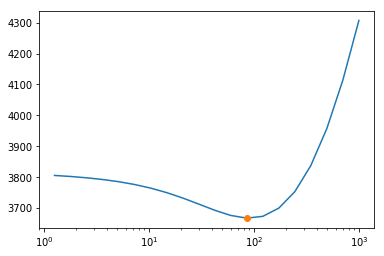

In [53]:
plt.plot(np.logspace(0.1, 3.0, num=20),r)
plt.xscale('log')
plt.plot(np.logspace(0.1, 3.0, num=20)[r.index(min(r))],min(r), 'o')
plt.show()

In [54]:
ridge_opt = Ridge(alpha=np.logspace(0.1, 3.0, num=20)[r.index(min(r))])

In [55]:
ridge_opt.fit(x_train, y_train)

Ridge(alpha=85.42381193020124, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
mse_ridge = mean_squared_error(ridge_opt.predict(x_test), y_test)

In [57]:
"Le paramètre de régularisation optimal est {:.2f}, le risque associé sur le test vaut alors {:.2f}".format(np.logspace(0.1, 3.0, num=20)[r.index(min(r))],mse_ridge)

'Le paramètre de régularisation optimal est 85.42, le risque associé sur le test vaut alors 3780.93'

### (Q13) 
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner
le risque de prédiction associé.

In [58]:
lasso = LassoCV()

In [59]:
lasso.fit(x_train, y_train.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [60]:
"Le paramètre de régularisation du LASSO est de {:.4f}, le risque de prédiction associé vaut {:.2f}".format(lasso.alpha_, mean_squared_error(lasso.predict(x_train), y_train))

'Le paramètre de régularisation du LASSO est de 6.7230, le risque de prédiction associé vaut 3062.51'

### (Q14)
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux
variables sélectionnées. Cette méthode est appelé Least-square LASSO

In [61]:
np.nonzero(lasso.coef_)[0]

array([ 17,  22,  58,  84, 123, 129, 135, 147, 167, 174])

In [62]:
"Les variables sélectionnées par le LASSO sont {}".format(",".join(map(str,np.nonzero(lasso.coef_)[0])))

'Les variables sélectionnées par le LASSO sont 17,22,58,84,123,129,135,147,167,174'

In [63]:
"Il y en a {}".format(np.count_nonzero(lasso.coef_))

'Il y en a 10'

In [64]:
lr_lasso = LinearRegression()

In [65]:
lr_lasso.fit(x_train[np.nonzero(lasso.coef_)[0]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
mean_squared_error(lr_lasso.predict(x_test[np.nonzero(lasso.coef_)[0]]), y_test)

3288.5106464433857

### (Q15) 
Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les
variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une
méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée
et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances
moindres par rapport à OLS peuvent se produire. Commenter.

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

/home/b/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


J'ai choisi d'utiliser GradientBoostingRegressor sur les variables sélectionnées par l'algorithme du Lasso.

In [68]:
mse = []
r=[]
for d in [1,2,3,5,10,20,50,100]:
    gbr = GradientBoostingRegressor(max_depth = d)
    for train_index, test_index in kf.split(x_train):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        gbr.fit(X_train[np.nonzero(lasso.coef_)[0]], Y_train.values.ravel())
        mse.append(mean_squared_error(gbr.predict(X_test[np.nonzero(lasso.coef_)[0]]), Y_test))
    r.append(np.array(mse).mean())
    print('d :'+ str(d) + "----> risques mean :" + str(r[-1]))

d :1----> risques mean :3255.7424842985256
d :2----> risques mean :3314.034340215329
d :3----> risques mean :3394.40836023126
d :5----> risques mean :3475.1312723549936
d :10----> risques mean :3733.6152600257496
d :20----> risques mean :4018.1067721979066
d :50----> risques mean :4228.983571320232
d :100----> risques mean :4371.323535773457


Par validation croisée on trouve que la profondeur maximale optimale est de 1 ce qui peut paraitre surprenant. On obtient alors un risque de 3255 ce qui est moins bon que LassoCV